In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_classes=2,
    random_state=42
)

# Create a DataFrame
columns = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y

# Save the dataset to a CSV file
df.to_csv('synthetic_dataset.csv', index=False)


In [2]:
# Data exploration
print(df.head())
print(df.info())
print(df['Target'].value_counts())


   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   0.964799  -0.066449   0.986768  -0.358079   0.997266   1.181890   
1  -0.916511  -0.566395  -1.008614   0.831617  -1.176962   1.820544   
2  -0.109484  -0.432774  -0.457649   0.793818  -0.268646  -1.836360   
3   1.750412   2.023606   1.688159   0.006800  -1.607661   0.184741   
4  -0.224726  -0.711303  -0.220778   0.117124   1.536061   0.597538   

   Feature_6  Feature_7  Feature_8  Feature_9  Target  
0  -1.615679  -1.210161  -0.628077   1.227274       0  
1   1.752375  -0.984534   0.363896   0.209470       1  
2   1.239086  -0.246383  -1.058145  -0.297376       1  
3  -2.619427  -0.357445  -1.473127  -0.190039       0  
4   0.348645  -0.939156   0.175915   0.236224       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_0  1000 non-null   float64
 1   Featur

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Target', axis=1),
    df['Target'],
    test_size=0.2,
    random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_scaled)


In [5]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)


Accuracy: 0.81
Confusion Matrix:
 [[77 12]
 [26 85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80        89
           1       0.88      0.77      0.82       111

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200



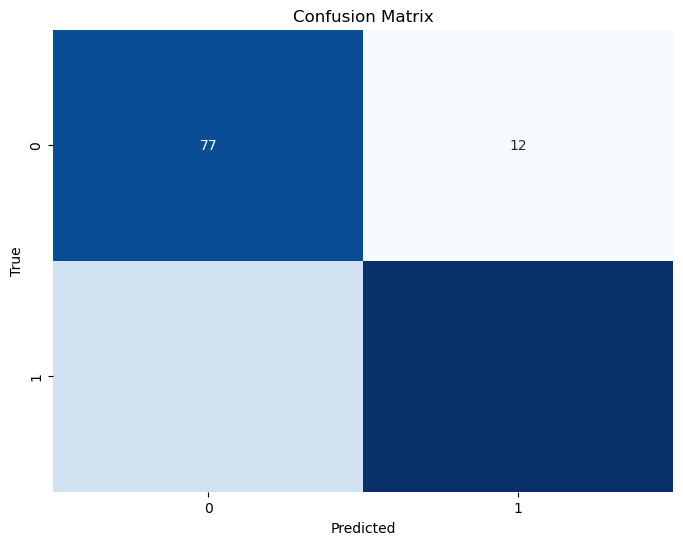

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize Accuracy
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


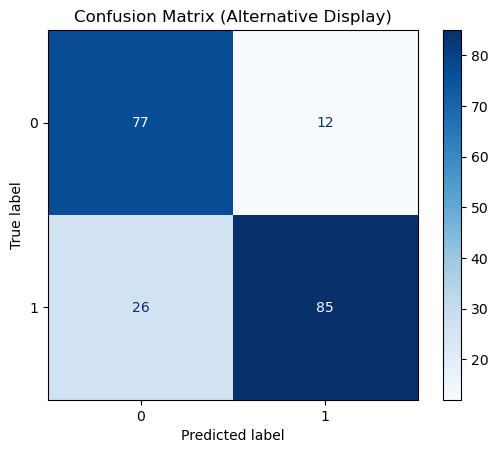

In [8]:
# Visualize Confusion Matrix (alternative display)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d")
plt.title('Confusion Matrix (Alternative Display)')
plt.show()


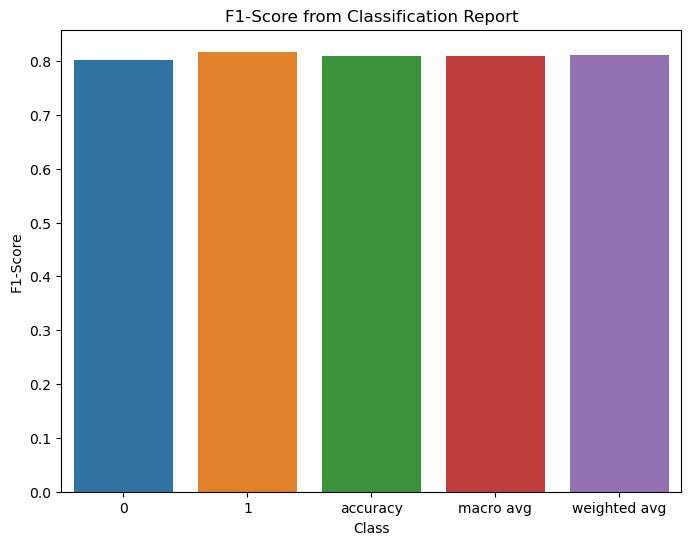

In [9]:
# Visualize Classification Report (F1-Score)
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).T

plt.figure(figsize=(8, 6))
sns.barplot(x=class_report_df.index, y=class_report_df['f1-score'])
plt.title('F1-Score from Classification Report')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.show()


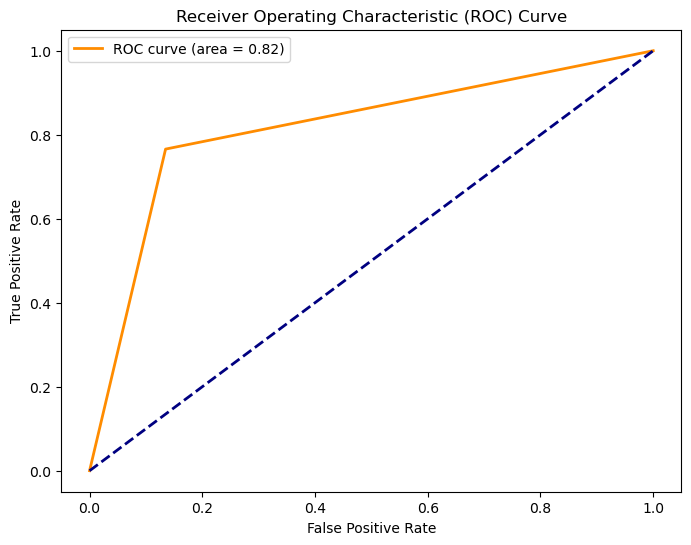

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are already defined
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

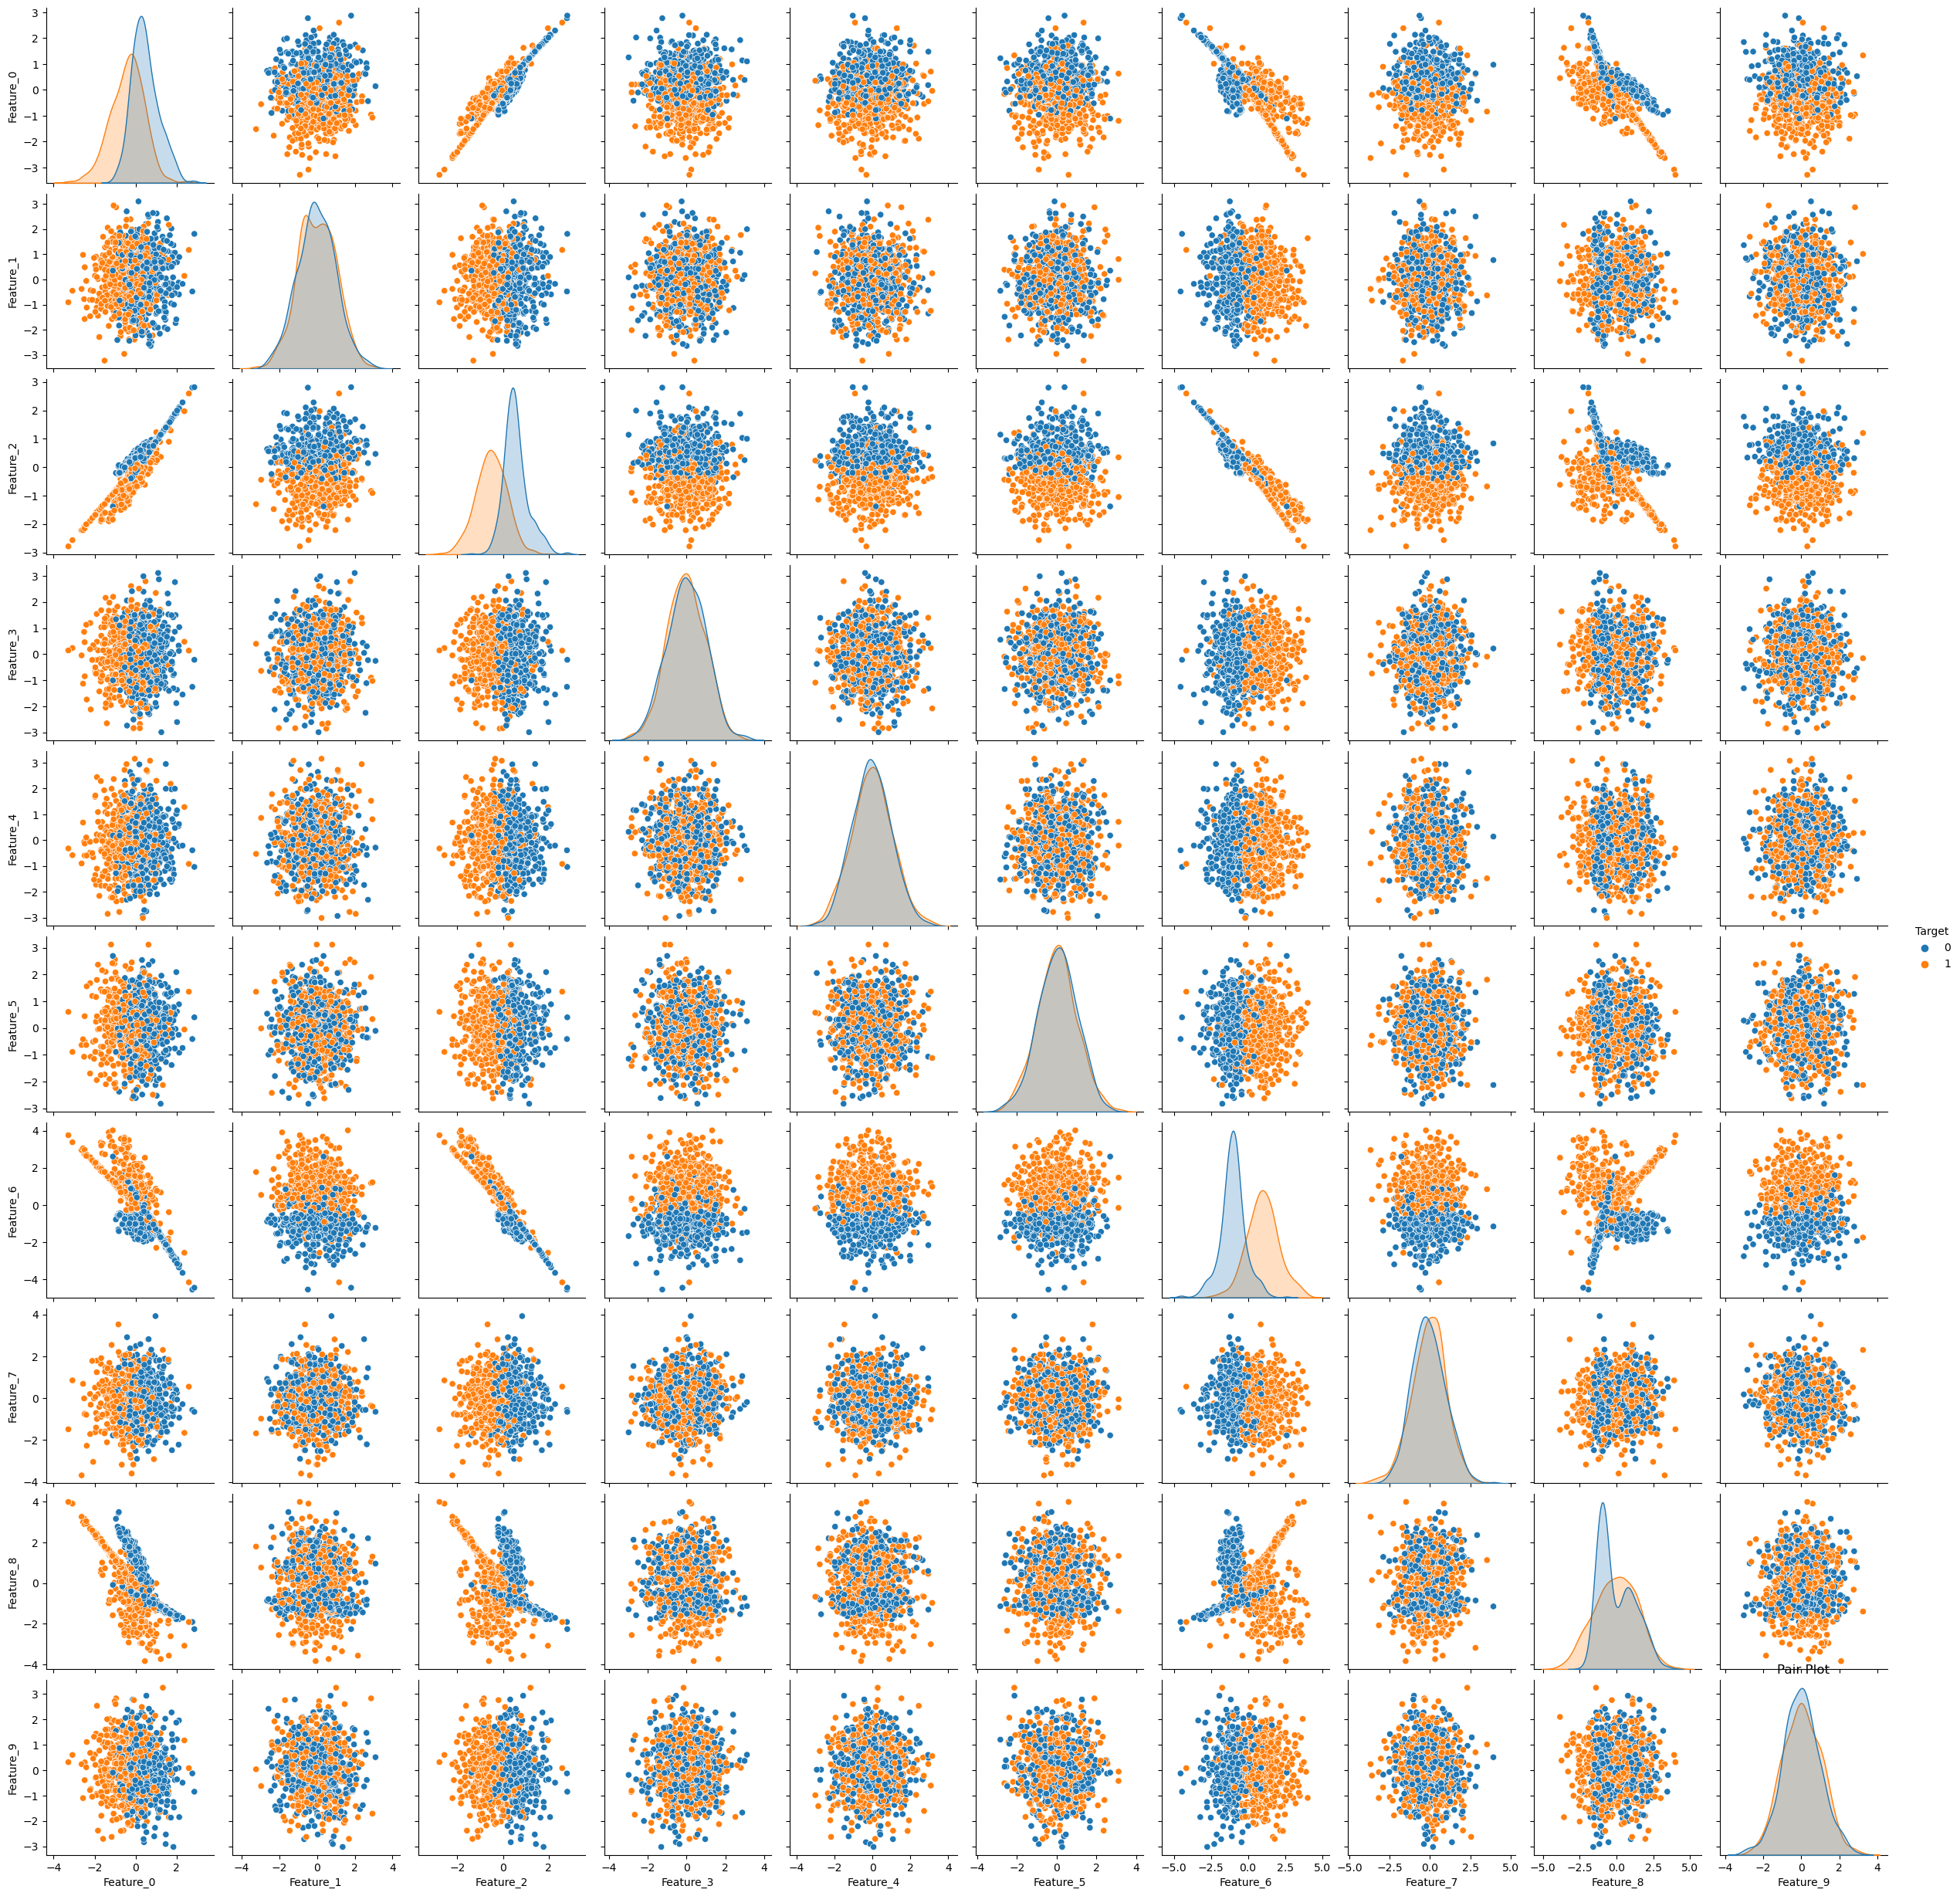

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Assuming df is your DataFrame containing features and the 'Target' column
# Modify the columns list based on your actual feature names
columns = [f'Feature_{i}' for i in range(X.shape[1])] + ['Target']
pair_plot_df = df[columns]

# Suppress FutureWarning related to use_inf_as_na
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    # Create a pair plot
    plt.figure(figsize=(12, 8))
    sns.pairplot(pair_plot_df, hue='Target')
    plt.title('Pair Plot')
    plt.show()


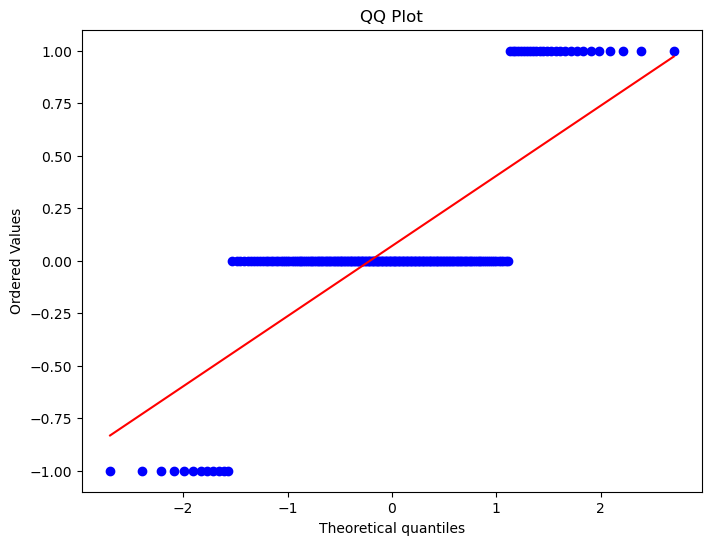

In [14]:
import matplotlib.pyplot as plt
from scipy import stats

# Assuming residuals is a variable containing the model residuals
# You can replace residuals with the actual residuals from your model
residuals = y_test - y_pred

# Create QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()
